<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/dwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import sys
import h5py #librerua para crear archivos , h5py
import pandas as pd
import math
from scipy.fft import fft, fftfreq

In [ ]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [ ]:

def get_selected_key_and_data(h5py_file_path, index=0):
    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys_1 = list(h5_file.keys())
        selected_key = keys_1[index]
        selected_data = h5_file[selected_key][:]
        print("Selected Key:", selected_key)
    return selected_key, selected_data

In [ ]:
def get_lengths_array(coeffs, upper_level):
    sample_counts = [len(arr) for arr in coeffs]
    time_arrays = [np.linspace(0, upper_level, num=samples, endpoint=False) for samples in sample_counts]
    return time_arrays

In [ ]:
def plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2):
    num_graphs = len(time_arrays_1)  # Assuming both sets have the same length

    title = [None] * num_graphs
    title[0] = "A" + str(num_graphs - 1)
    title[1] = "D" + str(num_graphs - 1)

    for i in range(2, num_graphs):
        title[i] = "D" + str(num_graphs - i)

    for i in range(num_graphs):
        plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
        # Create titles based on coefficient array lengths
        title_set_1 = title[i]
        title_set_2 = title[i]

        # Check if index is within the range of arrays
        if i < len(time_arrays_1) and i < len(coeffs_1):
            # Plot the first set (time_arrays_1 vs coeffs_1)
            plt.subplot(1, 2, 1)
            plt.plot(time_arrays_1[i], coeffs_1[i], label=title_set_1, color='red')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 1: {title_set_1}')

            # Plot the second set (time_arrays_2 vs coeffs_2)
            plt.subplot(1, 2, 2)
            plt.plot(time_arrays_2[i], coeffs_2[i], label=title_set_2, color='blue')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 2: {title_set_2}')

            plt.tight_layout()  # Adjust the layout for better visualization
            plt.show()  # Display the current plot window

    return title

In [ ]:

def band_maker(coeffs, fs, title):
    p = len(coeffs)- 1
    low_frequencies = [None] * len(coeffs)
    high_frequencies = [None] * len(coeffs)

    # low_frequencies[0] = 0
    # high_frequencies[0] = fs / (2 ** (p) * 2)
    for i in range(0, len(coeffs)):
         high_frequencies[i] = fs / (2 ** (p+-i + 1))
    low_frequencies[0]=0
    low_frequencies[1:len(low_frequencies)]= high_frequencies[:len(low_frequencies) - 1]



    return  high_frequencies,low_frequencies


In [ ]:
def frequencies_maker(N,fs,d,D,theta):
  theta=(theta/180)*np.pi
  FTF=(fs/2)*(1-d/D*np.cos(theta))
  BPFI=(N*fs/2)*(1+d/D*np.cos(theta))
  BPFO=(N*fs/2)*(1-d/D*np.cos(theta))
  BSF=(D*fs/d)*(1-(d/D)**2*np.cos(theta))
  return(FTF,BPFI,BPFO,BSF)


In [ ]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


In [ ]:
 print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [ ]:
print(pywt.wavelist('db'))

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


In [ ]:
FTF,BPFI,BPFO,BSF=frequencies_maker(9,50.17,7.90,38.5,0)
data = {
    'Name': ['Fundamental train frequency (FTF)', 'Ball pass frequency inner (BPFI)', 'Ball pass frequency outer (BPFO)','Ball spin frequency (BSF)'],
    'Values (HZ)': [FTF, BPFI, BPFO,BSF]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

                                Name  Values (HZ)
0  Fundamental train frequency (FTF)    19.937688
1   Ball pass frequency inner (BPFI)   272.090805
2   Ball pass frequency outer (BPFO)   179.439195
3          Ball spin frequency (BSF)   234.204744


In [ ]:
## calculo el nivel del banco de filtro:
fs=math.ceil(FTF) #frecuencia natural , se usa la del train frequencie
fe=25.6e3 # frecuencia de sampleo
n = math.ceil(math.log(fe / fs) / math.log(2)) +2
level = n

In [ ]:
time_array=graficador.plot_data_from_h5py(output_file[1])

In [ ]:
h5py_file_path=output_file[1]
selected_key_fault,selected_data_fault=get_selected_key_and_data(h5py_file_path, index=5)

Selected Key: vibration_inner_1


In [ ]:

w = pywt.Wavelet('db38')
signal_faulty= selected_data_fault[:,2] ##rodamiento b bajo falla (eje y)
# # Perform DWT
coeffs_2 = pywt.wavedec(signal_faulty, w, level=level)
time_arrays_2=get_lengths_array(coeffs_2,300)

In [ ]:
time_array=graficador.plot_data_from_h5py(output_file[1])

In [ ]:
h5py_file_path=output_file[1]
selected_key_healty,selected_data_healty=get_selected_key_and_data(h5py_file_path, index=8)

Selected Key: vibration_normal_0


In [ ]:
##3calculo    A en el eje x  sano
w = pywt.Wavelet('db38')
signal_healty= selected_data_healty [:,2]
# # Perform DWT
coeffs_1 = pywt.wavedec(signal_healty, w, level=level)
time_arrays_1=get_lengths_array(coeffs_1,300)

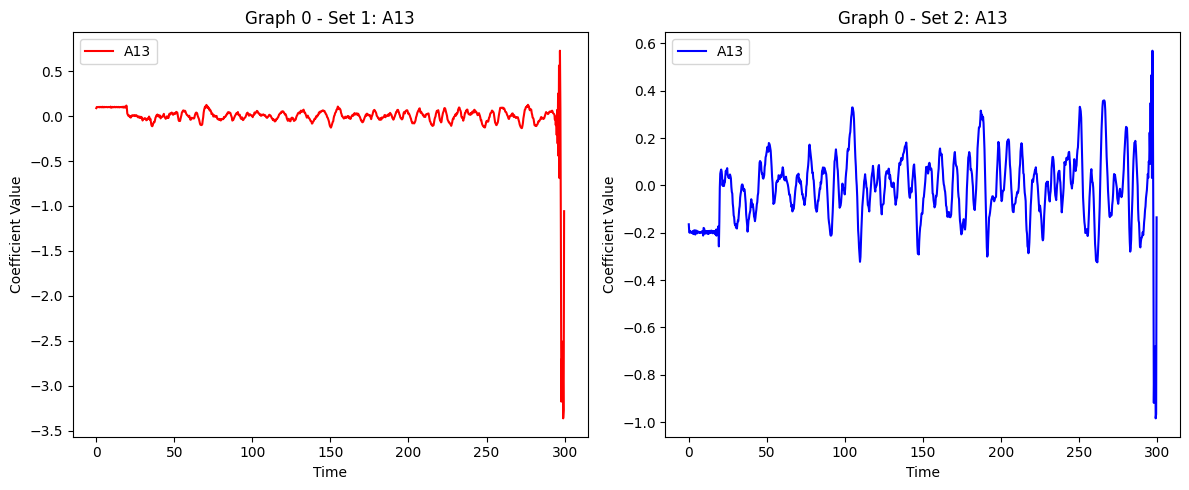

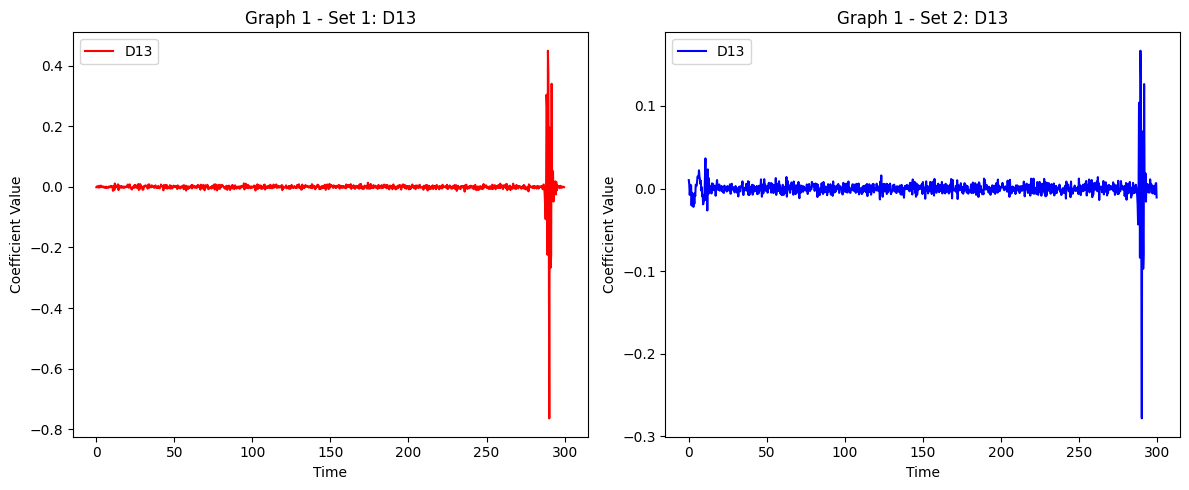

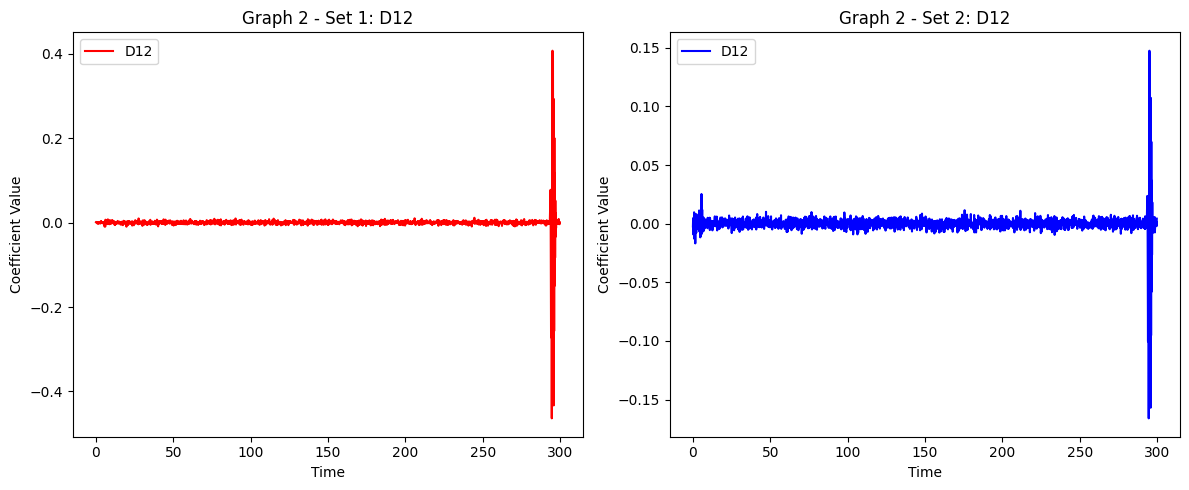

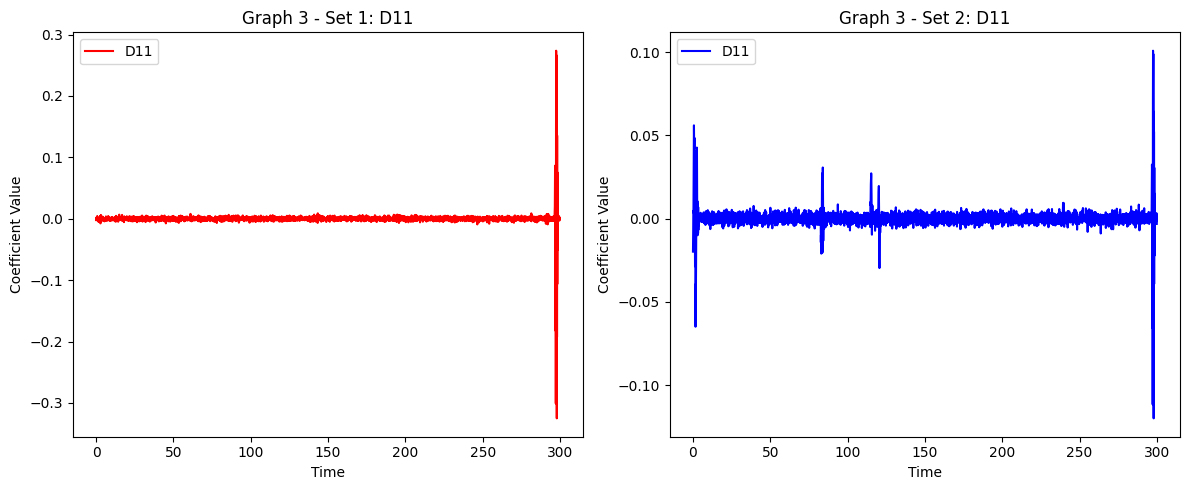

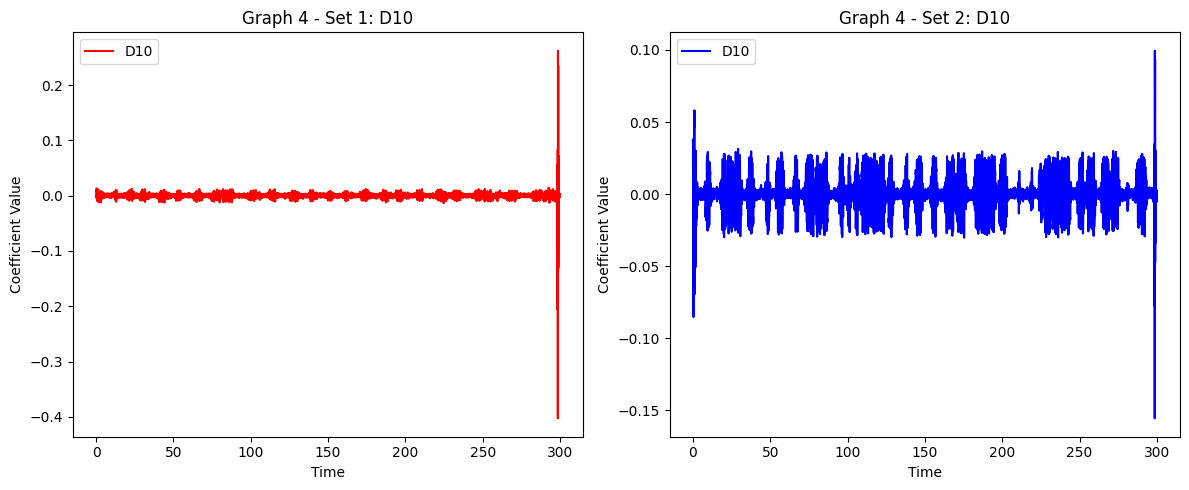

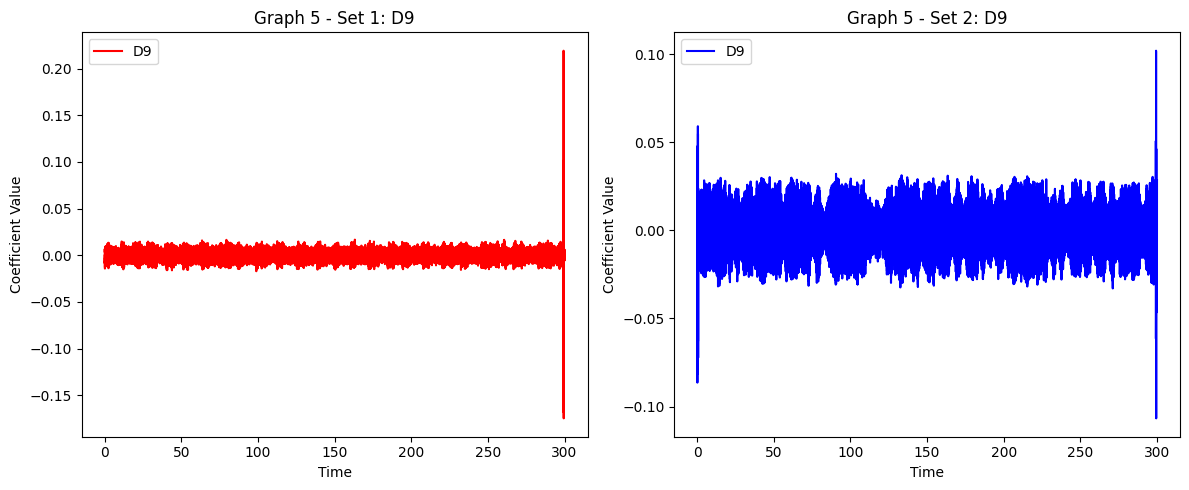

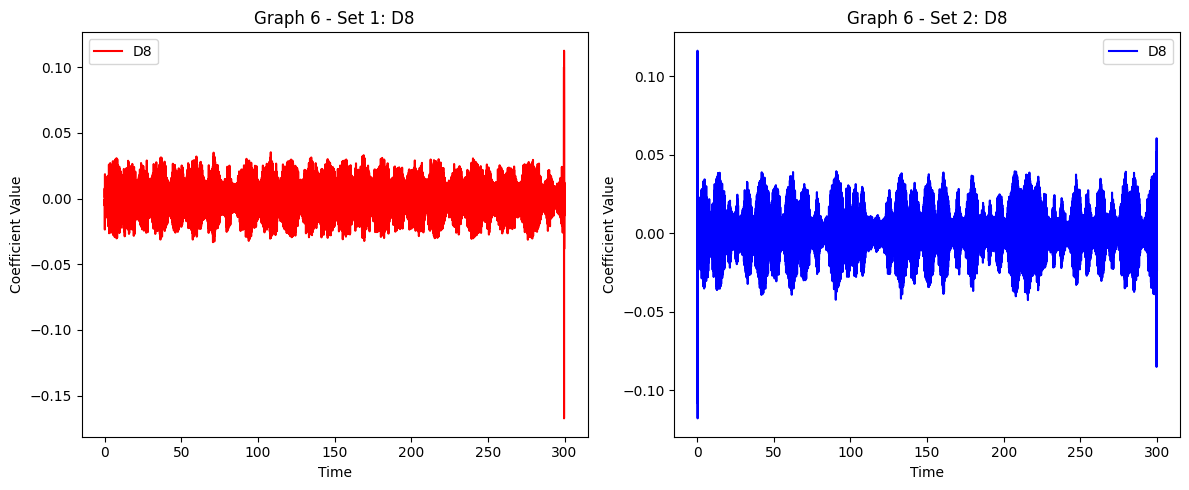

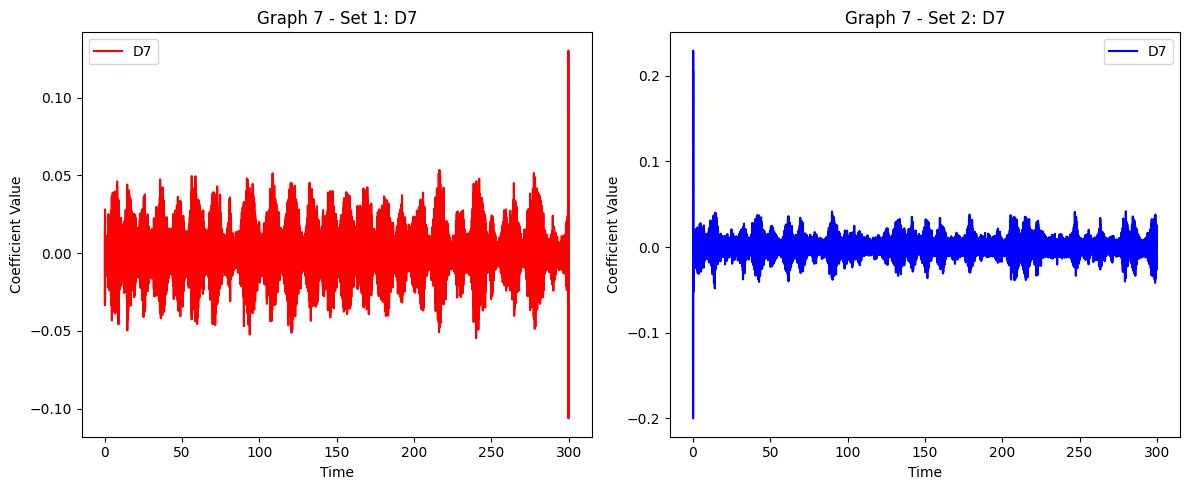

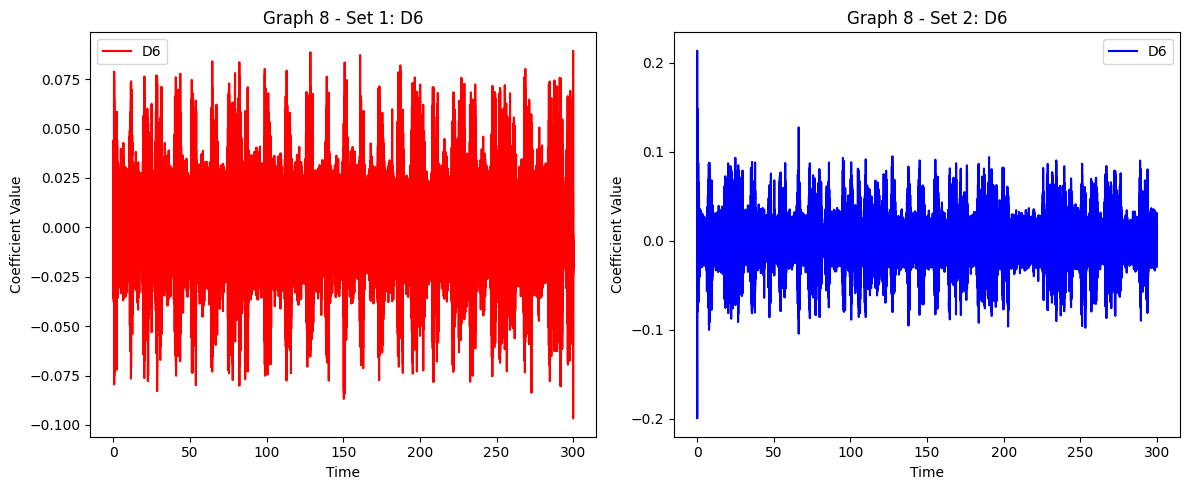

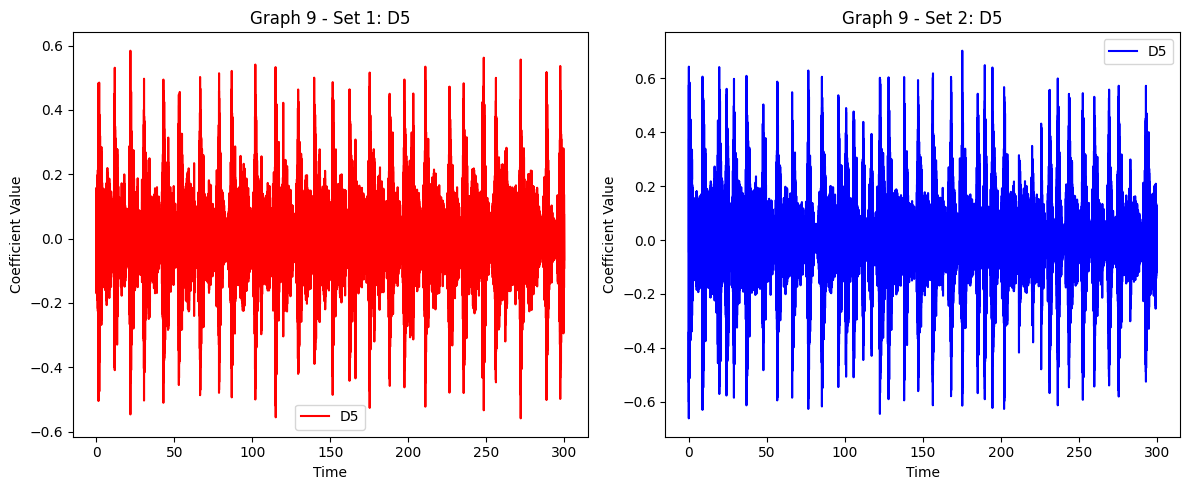

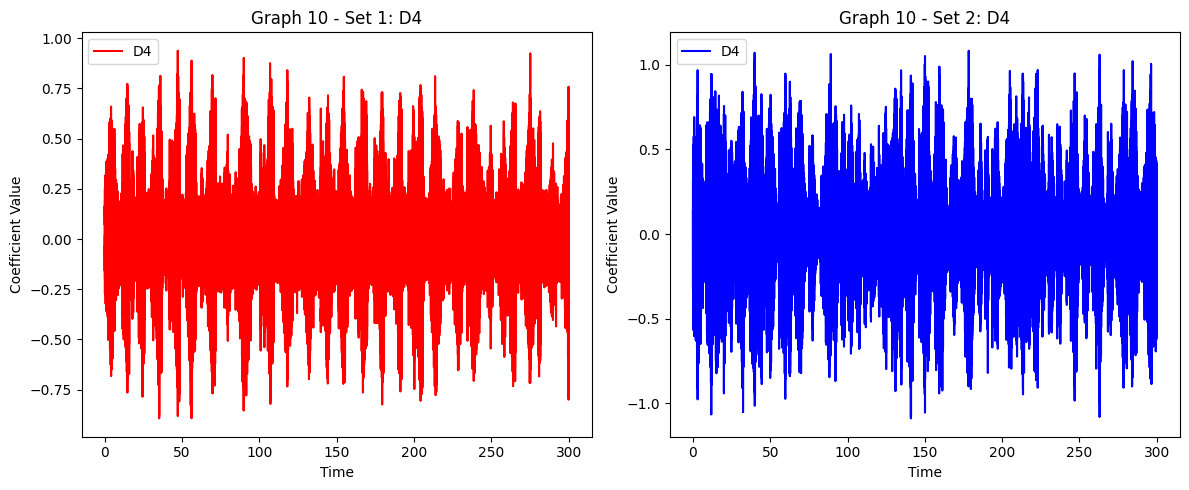

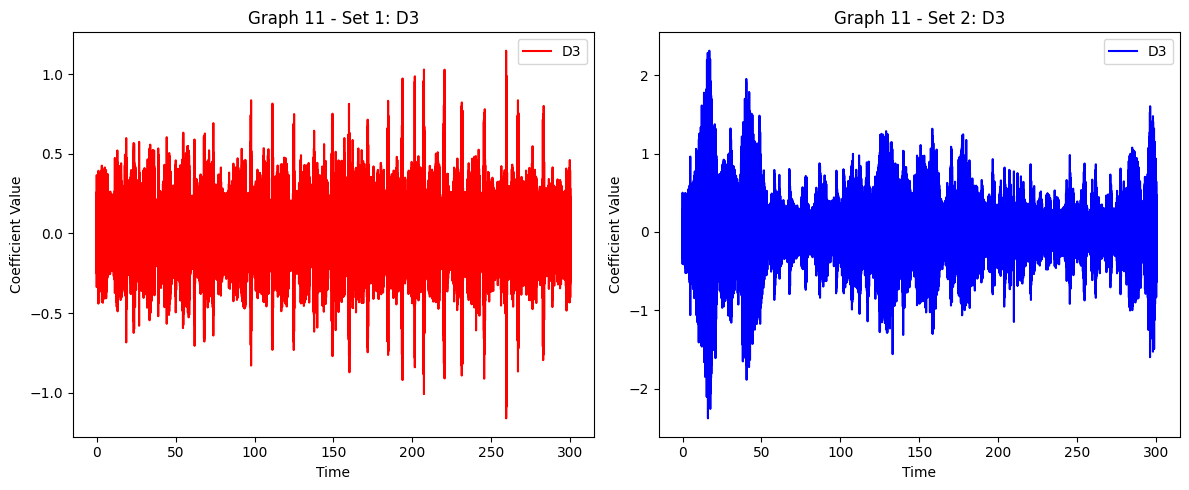

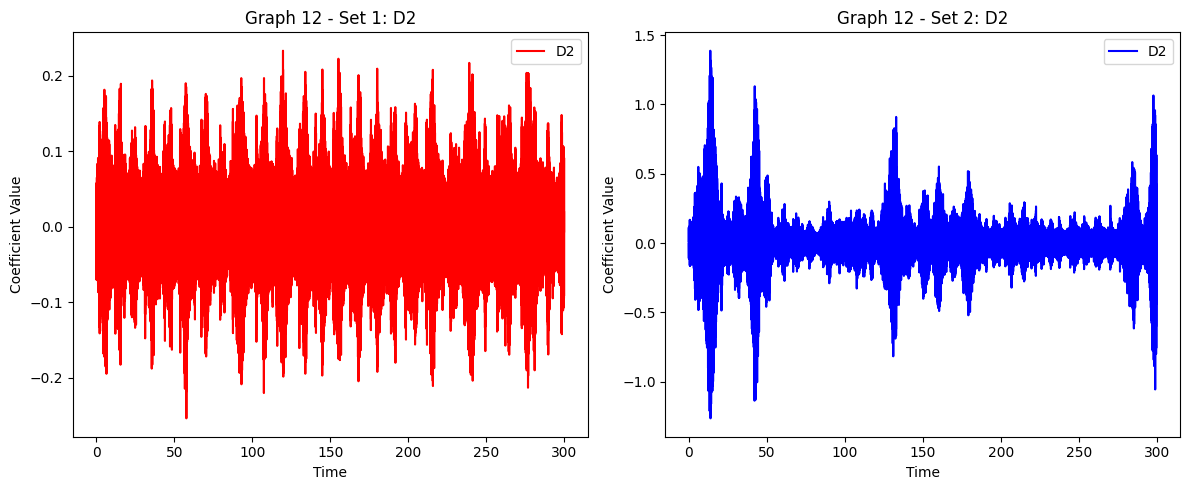

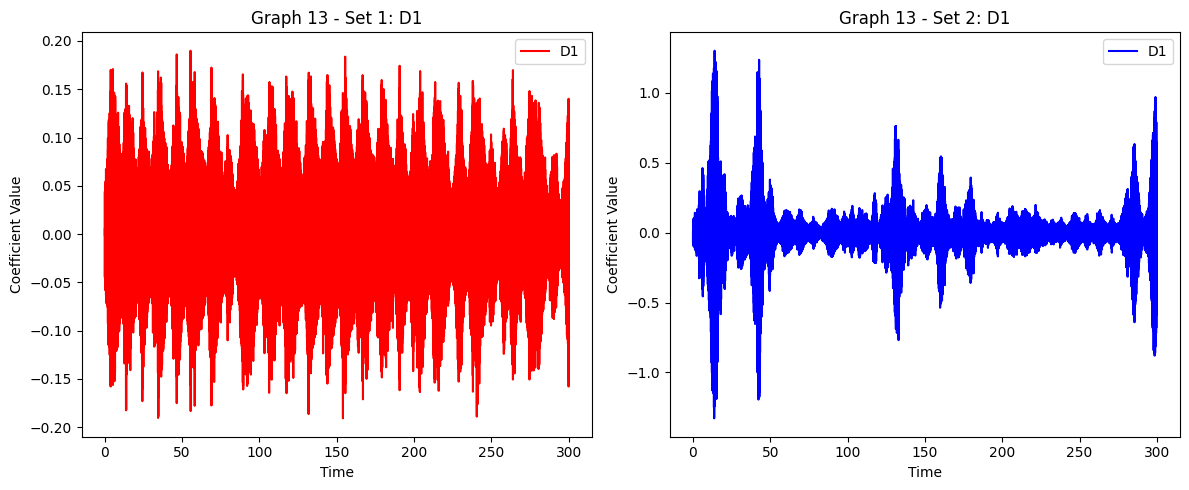

In [ ]:
title=plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2)

In [ ]:

fs = 25.6e3
high_frequencies,  low_frequencies = band_maker(coeffs_2, fs, title)
df = pd.DataFrame({'Coefficient': title, 'Low Frequency': low_frequencies, 'High Frequency': high_frequencies})
df


In [ ]:
energies_healty = []
x=coeffs_1
for sub_array in x:
    energy = np.sum(np.abs(sub_array)**2)
    energies_healty.append(energy)
max_energy = max(energies_healty)
normalized_energies_healty = [energy / max_energy for energy in energies_healty]

In [ ]:
energies_faulty = []
x_1=coeffs_2
for sub_array in x_1:
    energy = np.sum(np.abs(sub_array)**2)
    energies_faulty .append(energy)
max_energy = max(energies_faulty)
normalized_energies_faulty = [energy / max_energy for energy in energies_faulty]

In [154]:
df = pd.DataFrame({'Coefficient': title, 'Nivel de energia rodamiento sano ':  energies_healty, 'Nivel de energia rodamiento bajo falla ': energies_faulty})
df

,Coefficient,Nivel de energia rodamiento sano,Nivel de energia rodamiento bajo falla
0,A13,62.804240,7.596134e+04
1,D13,1.494738,1.713953e+03
2,D12,1.339830,1.548430e+03
3,D11,0.620230,7.047435e+02
4,D10,0.555055,5.351585e+02
5,D9,0.827014,3.861197e+02
6,D8,3.845289,2.117204e+02
7,D7,7.501974,1.418558e+03
8,D6,35.403095,8.184306e+03
9,D5,1531.450479,1.463695e+06


In [ ]:
df = pd.DataFrame({'Coefficient': title, 'Nivel de energia rodamiento sano normalizado':  normalized_energies_healty, 'Nivel de energia rodamiento bajo falla normalizado ': normalized_energies_faulty})
df

In [ ]:
def find_indices_with_name(h5py_file_path, target_name): # #esta funcion me permite buscar los indices asociados a a mi palabra target
    indices = []

    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for index, key in enumerate(keys):
            if target_name in key:
                indices.append(index)

    return indices

In [ ]:
def get_selected_keys_and_data(h5py_file_path, target_name, index): #funcion que en base a los indices me devuelve las keys
    selected_keys = []

    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for key in keys:
            if target_name in key:
                selected_keys.append(key)


    return selected_keys

In [ ]:
def return_data(output_file, target_name):
  all_selected_keys_1 = []

  for file_path in output_file:
      indices = find_indices_with_name(file_path, target_name)
      selected_keys = get_selected_keys_and_data(file_path,target_name, indices)

      for key in (selected_keys):
          all_selected_keys_1.append([key])
  all_keys= [None] * len(all_selected_keys_1)
  ##########################################
  for i in range(0,len(all_selected_keys_1)): # aqui creo la lista para guardar los string de las key
      all_keys[i]=all_selected_keys_1[i][0]
      #######################################
  selected_data = []
  #########################################
  for selected_key in all_keys: # algoritmo para obtener la data en el orden de las keys
    for file_path in output_file:
      with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        if selected_key in keys:
          #print("esta en el archivo")
          selected_data.append( h5_file[selected_key][:])

        else:
          #print('no esta ')
          continue

  return (all_keys,selected_data)


In [ ]:
def calculate_energy_levels(selected_data, wavelet='db38', level=5):
    w = pywt.Wavelet(wavelet)
    array_dwt = np.empty((len(selected_data), selected_data[0].shape[1]), dtype=list)

    for j in range(len(selected_data)):
        for i in range(selected_data[j].shape[1]):
            coeffs = pywt.wavedec(selected_data[j][:, i], w, level=level)
            energies_levels = [np.sum(np.abs(coeffs)**2) for coeffs in coeffs]
            array_dwt[j, i] = energies_levels

    return array_dwt

In [ ]:
def new_energies(energies_level):
  energies=void_array = np.empty(energies_level.shape)
  for i,x in enumerate(energies_level):




Calculo de los coeficientes energeticos para el caso vibration_normal (velocidad variable)


In [ ]:
all_keys_normal,selected_data_normal=return_data(output_file, "normal")

In [166]:
all_keys_normal

['vibration_normal_0',
 'vibration_normal_1',
 'vibration_normal_2',
 'vibration_normal_constant',
 'vibration_normal_3',
 'vibration_normal_4',
 'vibration_normal_5',
 'vibration_normal_6']

In [ ]:
energies_level_normal=calculate_energy_levels(selected_data_normal, wavelet='db38', level=level)

In [173]:
energies_level_normal[7]

array([list([15.984363823838834, 0.36412006338951025, 0.3304991496347605, 0.2567681863082122, 0.7575457467273048, 2.886118965621906, 0.9927209377519817, 3.319523137901937, 37.76533989241207, 2812.6157078676815, 34132.22081205255, 12679.618135908724, 10820.991335683331, 3651.197551615436]),
       list([28.846338588040254, 0.07399462064872094, 0.06637773674569913, 0.1292234186670581, 1.1156341674239563, 2.997512539334354, 0.7688088949675853, 1.0255648013283278, 30.731938517695628, 391.45954367782934, 2441.490187913634, 18574.370869747643, 6764.752020497128, 5887.240912571138]),
       list([64.86741731217356, 1.1393457300347296, 1.0176744678309786, 0.48009359335439455, 0.4320829908511473, 0.7096290107284909, 3.6003861037482285, 6.001710745003203, 32.71453568133185, 1126.5948649440597, 7471.694308738533, 11403.444605854733, 2141.1720381545097, 2460.797081564415]),
       list([4.692787199884581, 0.048620873625911, 0.0391474031167611, 0.04122415633277554, 0.27711749613904313, 1.3305899078

In [184]:
energies_level_normal[0]

array([list([77.1609500219592, 1.6365729596388838, 1.4667838572951635, 0.6937087261226765, 0.842758940904632, 2.671871534497961, 1.1885999106541656, 3.0060215942494146, 39.872437141188705, 3694.9949080564484, 36982.515908051566, 13924.955199544964, 12105.155406887377, 3884.2269823644083]),
       list([5.096027992465955, 0.04009560362199287, 0.03498180660883933, 0.04823882058317971, 0.8911656011079796, 2.6887450729271762, 0.9237345799418348, 1.2436786491326892, 35.020154950690404, 573.8295529491345, 2580.403772255577, 18153.074075378667, 6761.33777466329, 6697.065256495792]),
       list([62.8042400881876, 1.4947377622196207, 1.339829643475943, 0.6202300330930044, 0.5550551011588137, 0.8270141790893465, 3.8452890613199315, 7.501973872905552, 35.4030951476353, 1531.4504791297472, 9019.349599814472, 11002.88488548717, 2082.9143386013093, 3162.2747478443716]),
       list([5.823229937394386, 0.1095842709215278, 0.09891091297889443, 0.05773210209606128, 0.2549703927738472, 1.35536813383547

Calculo de los coeficientes energeticos para el caso vibration_ball (velocidad variable)


In [ ]:
all_keys_ball,selected_data_ball=return_data(output_file, "ball")

In [ ]:
energies_level_ball=calculate_energy_levels(selected_data_ball, wavelet='db38', level=level)

Calculo de los coeficientes energeticos para el caso vibration_inner  (velocidad variable)



In [111]:
all_keys_inner,selected_data_inner=return_data(output_file, "inner")

In [135]:
energies_level_inner=calculate_energy_levels(selected_data_inner, wavelet='db38', level=level)

In [147]:
energies_level_inner.shape

(8, 4)

In [137]:
energies_level_new=(energies_level_inner[0])[2:]
energies_level_new

array([list([53217.1710123452, 1113.5580459523123, 999.8171334939879, 455.2682222519629, 364.2763170423675, 295.23092220903834, 194.86916479000809, 1622.6217376530926, 8556.333399900985, 1439803.5300702378, 7722448.244317433, 77701523.04710397, 43343674.91423838, 8466162.055759994]),
       list([11488.054263915685, 248.59064621420418, 224.74918144288083, 107.95922159946592, 180.07488730114545, 348.83664930978955, 203.47261312380513, 496.6853276879681, 4530.932173937603, 299990.3478220643, 1643286.613538087, 10912961.399438761, 82992577.53454302, 17602998.711357787])],
      dtype=object)

Calculo de los coeficientes energeticos para el caso vibration_outer (velocidad variable)

In [ ]:
all_keys_outer,selected_data_outer=return_data(output_file, "outer")

In [ ]:
energies_level_outer=calculate_energy_levels(selected_data_outer, wavelet='db38', level=level)